# How to Plot Voronoi Diagrams in Python

### Imports

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer.statsbomb import read_event, read_lineup, EVENT_SLUG, LINEUP_SLUG

## Plot the diagram

### From McKay Johns' [video](https://www.youtube.com/watch?v=BUKsBH9oQKg)

In [47]:
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


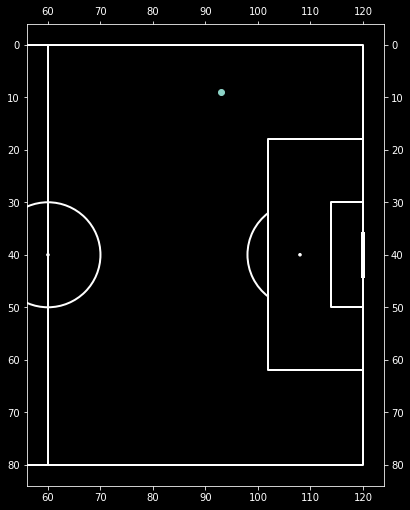

In [46]:
fig, ax = plt.subplots(figsize=(13, 8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type = 'statsbomb', orientation = 'horizontal',
             pitch_color = 'black', line_color = 'white', constrained_layout = False,
             half = True, axis = True, label = True, tick = True)

pitch.draw(ax=ax)

pitch.scatter(93,9,ax=ax)

In [50]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


Text(0.5, 1.0, 'Cadiz Low Block vs Barcelona')

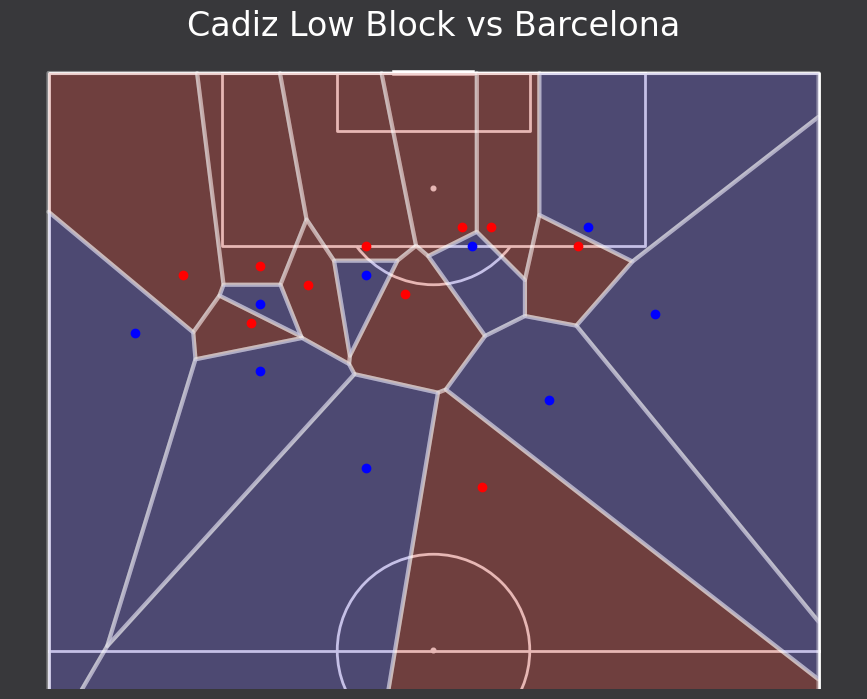

In [67]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

# The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type = 'statsbomb', pitch_color='#38383b',
                      line_color = 'white', constrained_layout = False, tight_layout = True,
                      half = True)

pitch.draw(ax=ax)

x=df.x
y=df.y
team1,team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)

# Plot players

for i in range(len(df['x'])):
    if df['team'][i]==0:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='blue')
    if df['team'][i]==1:
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='red')

plt.title('Cadiz Low Block vs Barcelona',c='white',fontsize=24,ha='center',va='center')

#plt.savefig('cadiz-low-block-vs-barcelona.png',dpi=500,bbox_inches = 'tight',facecolor='#38383b')

### From mplsoccer [example](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_voronoi.html)

In [69]:
# Get event and freeze frame data for game 8657. Belgium vs England. WC 2018

# df_lineup = read_lineup(f'{LINEUP_SLUG}/8657.json', warn=False)
dict_event = read_event(f'{EVENT_SLUG}/8657.json', 
                        related_event_df=False,
                        tactics_lineup_df=False, 
                        warn=False)

df_event = dict_event['event']
df_freeze = dict_event['shot_freeze_frame']

In [70]:
# Subset a shot
SHOT_ID = '5aa3cae9-f30d-4616-a556-f7faeae8f309'

df_freeze_frame = df_freeze[df_freeze.id == SHOT_ID].copy()
df_shot_event = df_event[df_event.id == SHOT_ID].dropna(axis=1, how='all').copy()

In [71]:
# Location dataset
# df_shot_event[['x', 'y']]  - location of the shot itself (and the player who did the shot)
# df_freeze_frame[['x', 'y']] - location of the other players on the pitch with flag True if the shot was made by the player from your team
df = pd.concat([df_shot_event[['x', 'y']], df_freeze_frame[['x', 'y']]])

x = df.x.values
y = df.y.values

teams = np.concatenate([[True], df_freeze_frame.player_teammate.values])

#### Plotting

Text(0.5, 1.0, 'Thomas Meunier Goal vs England. WC 2018')

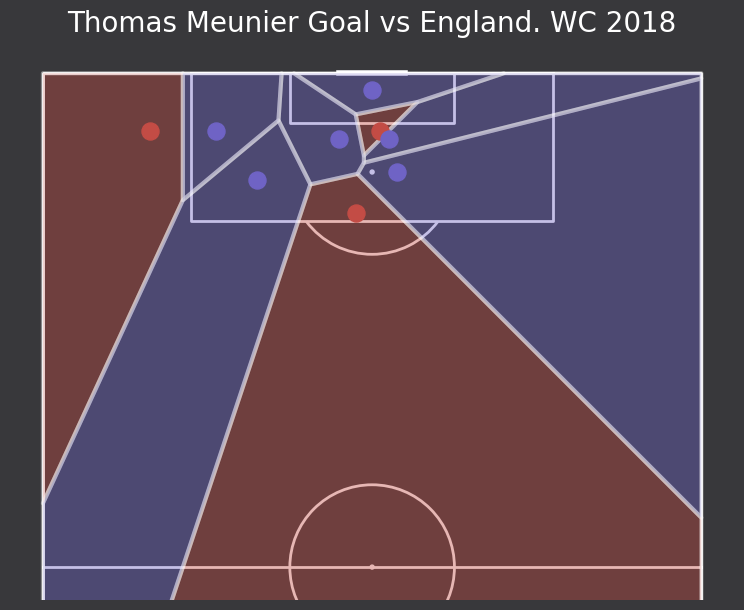

In [78]:
# draw plot
plt.style.use('default')

pitch = VerticalPitch(pitch_type = 'statsbomb', pitch_color='#38383b',
                      line_color = 'white', constrained_layout = False, tight_layout = True, half=True)
fig, ax = pitch.draw(figsize=(8, 6.2))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

# Plot Voronoi
team1, team2 = pitch.voronoi(x, y, teams)
t1 = pitch.polygon(team1, ax=ax, fc='#c34c45', ec='white', lw=3, alpha=0.4)
t2 = pitch.polygon(team2, ax=ax, fc='#6f63c5', ec='white', lw=3, alpha=0.4)

# Plot players
sc1 = pitch.scatter(x[teams], y[teams], ax=ax, c='#c34c45', s=150)
sc2 = pitch.scatter(x[~teams], y[~teams], ax=ax, c='#6f63c5', s=150)

plt.title("Thomas Meunier Goal vs England. WC 2018", color='white', size=20)
# https://youtu.be/x_5SJPKMHAA?t=7

In [79]:
fig.savefig('thomas-meunier-goal-vs-england-wc-2018-bronze-medal.png')